<a href="https://colab.research.google.com/github/gchiuffa/learning/blob/master/machine_learning_for_Dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn 

import pandas as pd

from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()


In [77]:
print(breast.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [84]:
target_name=list(breast.target_names)
target_name

['malignant', 'benign']

In [0]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[breast['data'], breast['target']],
                  columns= np.append(breast['feature_names'], ['target']))

In [29]:
df[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df, df["target"]):    
    strat_train_set = df.loc[train_index]    
    strat_test_set = df.loc[test_index] 

In [0]:
train_set=strat_train_set.drop('target', axis=1)
test_set=strat_test_set.drop('target', axis=1)

In [0]:
y=strat_train_set['target'].copy()
y_test=strat_test_set['target'].copy()

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
classificador = DecisionTreeClassifier()
classificador

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
classificador.fit(train_set,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
classificador.predict(train_set)

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0.

In [48]:
classificador.score(train_set,y)

1.0

In [0]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score(classificador, breast.data, breast.target, cv=5)

array([0.91304348, 0.93043478, 0.91150442, 0.92920354, 0.90265487])

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
#clf=grid_search.GridSearchCV(classificador,parameters)
n_iter_search = 20
random_search = RandomizedSearchCV(classificador, param_distributions=parameters,
                                   n_iter=n_iter_search, cv=5, iid=False)


In [57]:
random_search.fit(train_set, y)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [60]:
random_search.cv_results_

{'mean_fit_time': array([0.00654912, 0.00646515, 0.00164604, 0.00579357, 0.00511513,
        0.00269423, 0.00625577, 0.00163283, 0.00170703, 0.00267639,
        0.0016746 , 0.00267787, 0.0044476 , 0.00535035, 0.00164957,
        0.00166187, 0.00635257, 0.00164757, 0.00693078, 0.0027307 ]),
 'mean_score_time': array([0.00106254, 0.00096655, 0.00097785, 0.00095901, 0.00097342,
        0.00095096, 0.00096149, 0.00089755, 0.00098343, 0.00094376,
        0.00092731, 0.00090971, 0.00093374, 0.00107698, 0.00089946,
        0.00090599, 0.00095873, 0.00087943, 0.00141258, 0.00096817]),
 'mean_test_score': array([0.91208791, 0.91868132, 0.62637363, 0.93186813, 0.91648352,
        0.8967033 , 0.90989011, 0.62637363, 0.62637363, 0.8967033 ,
        0.62637363, 0.8967033 , 0.91208791, 0.91428571, 0.62637363,
        0.62637363, 0.91648352, 0.62637363, 0.91428571, 0.8967033 ]),
 'param_max_depth': masked_array(data=[9, 15, 9, 5, 5, 3, 7, 11, 1, 5, 9, 3, 3, 17, 1, 9, 11,
                    5, 11, 5]

In [0]:
final_model=random_search.best_estimator_


In [68]:
final_prediction = final_model.predict(test_set)
final_prediction

array([0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [70]:
result=pd.DataFrame(columns=['x2','y'])
result['x2']=final_prediction
result['y']=y_test
y_test

256    0.0
428    1.0
501    0.0
363    1.0
564    0.0
464    1.0
358    1.0
343    0.0
516    0.0
567    0.0
292    1.0
199    0.0
527    1.0
121    0.0
353    0.0
495    1.0
541    1.0
537    1.0
308    1.0
242    1.0
223    0.0
261    0.0
467    1.0
288    1.0
549    1.0
406    1.0
23     0.0
415    1.0
266    1.0
359    1.0
      ... 
205    0.0
51     1.0
483    1.0
568    1.0
200    1.0
523    1.0
423    1.0
519    1.0
535    0.0
321    0.0
83     0.0
296    1.0
1      0.0
344    1.0
203    0.0
298    1.0
127    0.0
24     0.0
14     0.0
102    1.0
180    0.0
461    0.0
246    1.0
198    0.0
504    1.0
95     0.0
128    1.0
257    0.0
228    1.0
488    1.0
Name: target, Length: 114, dtype: float64

No handles with labels found to put in legend.


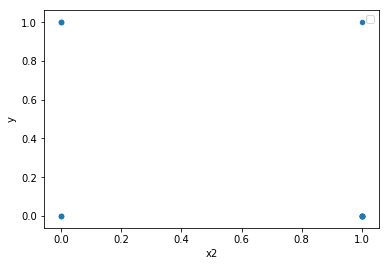

In [67]:
import matplotlib.pyplot as plt
result.plot(kind="scatter", x='x2', y='y')
plt.legend()

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(final_prediction,y_test)

In [0]:
from sklearn.utils.multiclass import unique_labels
import numpy as np
def plotcm(cm,classes,cmap):
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest',cmap=cmap)
  ax.figure.colorbar(im, ax=ax)
  ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='no normalized confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
  return ax

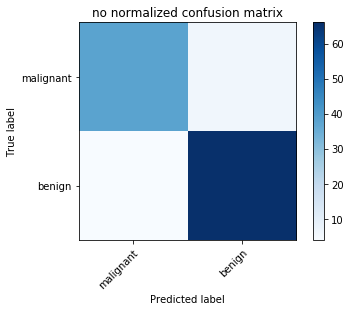

In [111]:
plotcm(cm,target_name,plt.cm.Blues)

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test, classes=[0, 1])
n_classes = 2
score=final_model.predict_proba(test_set)


In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

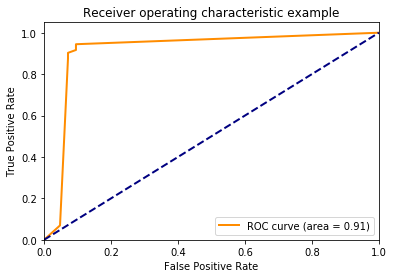

In [130]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
